# 1. Dataset Overview:
## 1.1. Install libraries

In [1]:
# !pip install -r requirements.txt

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import t, norm
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

## 1.2. Load data

In [3]:
# Load data
filepath = '../data/Sleep_health_and_lifestyle_dataset.csv'
data = pd.read_csv(filepath)

In [4]:
data

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


### Dataset Overview:
The Sleep Health and Lifestyle Dataset comprises 374 rows and 13 columns, covering a wide range of variables related to sleep and daily habits. It includes details such as gender, age, occupation, sleep duration, quality of sleep, physical activity level, stress levels, BMI category, blood pressure, heart rate, daily steps, and the presence or absence of sleep disorders.

### Dataset Columns:
- Person ID: An identifier for each individual.
- Gender: The gender of the person (Male/Female).
- Age: The age of the person in years.
- Occupation: The occupation or profession of the person.
- Sleep Duration (hours): The number of hours the person sleeps per day.
- Quality of Sleep (scale: 1-10): A subjective rating of the quality of sleep, ranging from 1 to 10.
- Physical Activity Level (minutes/day): The number of minutes the person engages in physical activity daily.
- Stress Level (scale: 1-10): A subjective rating of the stress level experienced by the person, ranging from 1 to 10.
- BMI Category: The BMI category of the person (e.g., Underweight, Normal, Overweight).
- Blood Pressure (systolic/diastolic): The blood pressure measurement of the person, indicated as systolic pressure over diastolic pressure.
- Heart Rate (bpm): The resting heart rate of the person in beats per minute.
- Daily Steps: The number of steps the person takes per day.
- Sleep Disorder: The presence or absence of a sleep disorder in the person (None, Insomnia, Sleep Apnea).

## 1.3. Clear Data

In this specific analysis, we will focus on the statistical calculation of the columns 'Quality of Sleep' and 'Stress Level' from the dataset.

In [5]:
# Clear data
data_df = data[['Quality of Sleep', 'Stress Level']]

In [6]:
data_df

,Quality of Sleep,Stress Level
0,6,6
1,6,8
2,6,8
3,4,8
4,4,8
...,...,...
369,9,3
370,9,3
371,9,3
372,9,3


# 2. Descriptive Statistics:
## 2.1. Calculate Descriptive Statistics:

In [7]:
# Calculate the variance
variance_df = pd.DataFrame(data_df.var()).transpose()
variance_df.index = ['variance']

# Calculate IQR
Q1 = data_df.quantile(0.25)
Q3 = data_df.quantile(0.75)
IQR = Q3 - Q1

IQR_df = pd.DataFrame(IQR).transpose()
IQR_df.index = ['IQR']

# Calculate Range
Range = data_df.max() - data_df.min()
Range_df = pd.DataFrame(Range).transpose()
Range_df.index = ['Range']

descriptive_data_df = pd.concat([data_df.describe(), variance_df, IQR_df, Range_df])

In [8]:
descriptive_data_df

,Quality of Sleep,Stress Level
count,374.000000,374.000000
mean,7.312834,5.385027
std,1.196956,1.774526
min,4.000000,3.000000
25%,6.000000,4.000000
50%,7.000000,5.000000
75%,8.000000,7.000000
max,9.000000,8.000000
variance,1.432703,3.148944
IQR,2.000000,3.000000


Then we extract the relevant statistics for further analysis.

In [9]:
def extract_measures(column_name, input_df):
    extracted_stat = input_df[column_name]

    extracted_stat = {
        "count": extracted_stat['count'],
        "mean": extracted_stat['mean'],
        "std": extracted_stat['std'],
        "min": extracted_stat['min'],
        "25%": extracted_stat['25%'],
        "50%": extracted_stat['50%'],
        "75%": extracted_stat['75%'],
        "max": extracted_stat['max'],
        "variance": extracted_stat['variance'],
        "IQR": extracted_stat['IQR'],
        "Range": extracted_stat['Range']
    }
    return extracted_stat

qos_ext = extract_measures('Stress Level', descriptive_data_df)
sl_ext = extract_measures('Quality of Sleep', descriptive_data_df)

In [10]:
qos_ext

{'count': 374.0,
 'mean': 5.385026737967914,
 'std': 1.7745264441985167,
 'min': 3.0,
 '25%': 4.0,
 '50%': 5.0,
 '75%': 7.0,
 'max': 8.0,
 'variance': 3.1489441011598314,
 'IQR': 3.0,
 'Range': 5.0}

In [11]:
sl_ext

{'count': 374.0,
 'mean': 7.31283422459893,
 'std': 1.1969559197336044,
 'min': 4.0,
 '25%': 6.0,
 '50%': 7.0,
 '75%': 8.0,
 'max': 9.0,
 'variance': 1.4327034737853186,
 'IQR': 2.0,
 'Range': 5.0}

## 2.2 Plot diagrams
### 2.2.1 Histogram and Box Plot

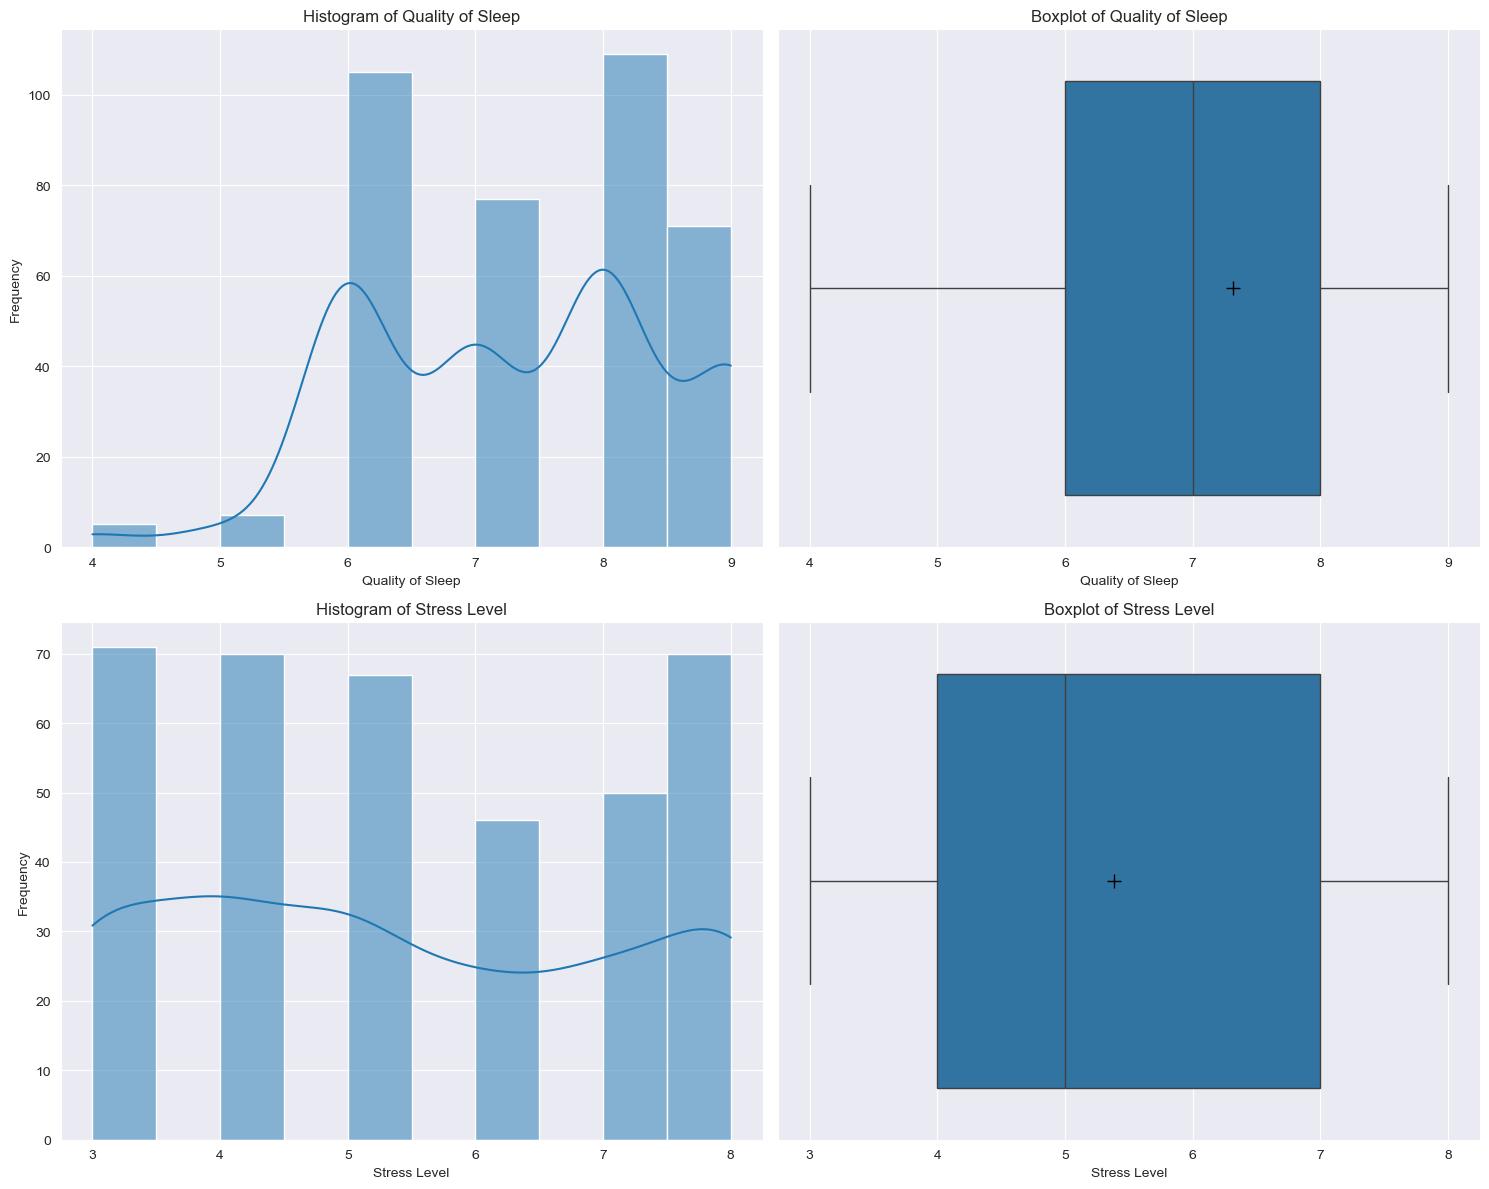

In [12]:
fig, axs = plt.subplots(2, 2, figsize=(15, 12))

# Histogram and Box Plot for Quality of Sleep
sns.histplot(data_df['Quality of Sleep'], ax=axs[0, 0], kde=True)
axs[0, 0].set_title(f'Histogram of Quality of Sleep')
axs[0, 0].set_xlabel('Quality of Sleep')
axs[0, 0].set_ylabel('Frequency')

sns.boxplot(x=data_df['Quality of Sleep'], ax=axs[0, 1], showmeans=True, meanprops={"marker": "+", "markeredgecolor": "black", "markersize": "10"})
axs[0, 1].set_title(f'Boxplot of Quality of Sleep')
axs[0, 1].set_xlabel('Quality of Sleep')

# Histogram and Box Plot for Stress Level
sns.histplot(data_df['Stress Level'], ax=axs[1, 0], kde=True)
axs[1, 0].set_title(f'Histogram of Stress Level')
axs[1, 0].set_xlabel('Stress Level')
axs[1, 0].set_ylabel('Frequency')

sns.boxplot(x=data_df['Stress Level'], ax=axs[1, 1], showmeans=True, meanprops={"marker": "+", "markeredgecolor": "black", "markersize": "10"})
axs[1, 1].set_title(f'Boxplot of Stress Level')
axs[1, 1].set_xlabel('Stress Level')

# Show Histogram and Box Plot
plt.tight_layout()
plt.show()

### 2.2.2. Plot scatter plot

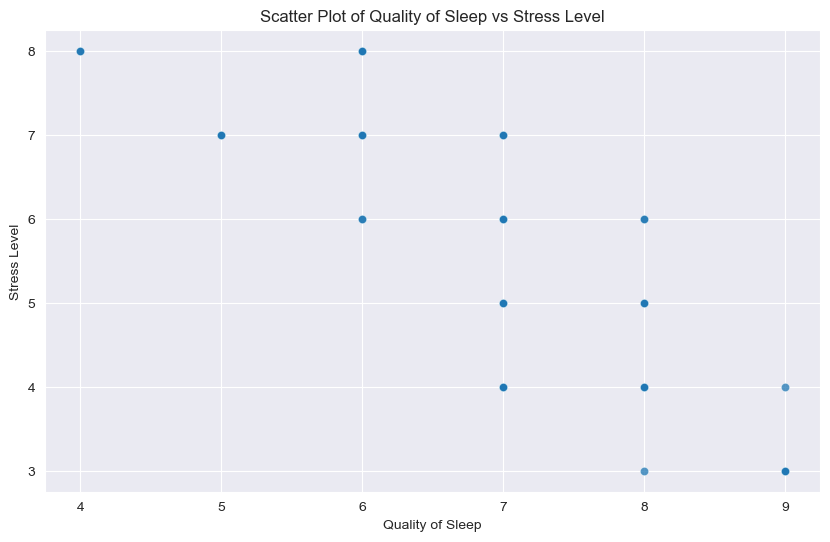

In [13]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data_df['Quality of Sleep'], y=data_df['Stress Level'], alpha=0.5)

# Adding titles and labels
plt.title(f'Scatter Plot of Quality of Sleep vs Stress Level')
plt.xlabel('Quality of Sleep')
plt.ylabel('Stress Level')

# Show plot
plt.show()

In [14]:
duplicates = data_df.duplicated(subset=['Quality of Sleep', 'Stress Level'])
print(f"Number of duplicate rows: {duplicates.sum()}")

Number of duplicate rows: 359


Since there are no duplicate rows in the data set, we visualize the scatter plot with jitter to better visualize the distribution of data points.

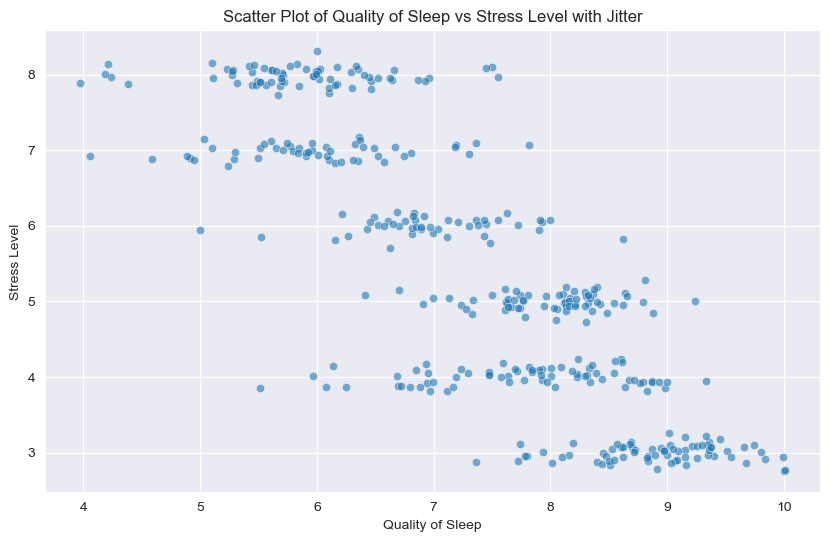

In [15]:
# Create jitter plot with random noise for better visualization
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data_df['Quality of Sleep'] + np.random.normal(0, 0.5, len(data_df)), 
                y=data_df['Stress Level'] + np.random.normal(0, 0.1, len(data_df)), alpha=0.6)

# Adding titles and labels
plt.title(f'Scatter Plot of Quality of Sleep vs Stress Level with Jitter')
plt.xlabel('Quality of Sleep')
plt.ylabel('Stress Level')

# Show plot
plt.show()

# 3. Random sample & Point estimation:

In [16]:
def randomly_sample_data(data: pd.DataFrame, column: str, sample_size_n: int):
    """
    Randomly sample n values from a column in the dataset.

    Parameters: data (pd.DataFrame): The dataset containing the column.
    column (str): The name of the column to sample.
    n (int): The number of samples to draw (n > 30).

    Returns: pd.Series: A sample of n values from the specified column.
    """
    if not sample_size_n > 30:
        raise ValueError("Sample size should be greater than 30")
    return data[column].sample(n=sample_size_n)

In [17]:
def point_estimation(sample):
    """
    Calculate point estimates (mean and standard deviation) for a sample.

    Parameters: sample (pd.Series): The sample data.

    Returns: dict: A dictionary with the sample mean and sample standard deviation.
    """
    sample_mean = sample.mean()
    sample_std = sample.std()
    return {"mean": sample_mean, "std": sample_std}

## 3.1. Randomly sample data:
Randomly sample data from each column based on user input and calculate point estimates (sample mean and standard deviation) for each sample.

In [18]:
while True:
    try:
        n = int(input("Enter the sample size (n > 30): "))  # Here I use 40
        
        sample_qos = randomly_sample_data(data_df, 'Quality of Sleep', n)
        sample_sl = randomly_sample_data(data_df, 'Stress Level', n)
        
        break
    except ValueError as e:
        print(e)

# Calculate point estimates for each sample
qos_point_estimates = point_estimation(sample_qos)
sl_point_estimates = point_estimation(sample_sl)

In [19]:
# Show Quality of Sleep sample data
sample_qos

247    7
206    8
117    8
130    8
347    9
46     7
199    6
281    6
127    8
236    6
223    6
88     8
154    8
201    8
164    8
353    9
19     7
329    9
163    8
365    9
3      4
356    9
242    6
358    9
26     7
146    8
333    9
103    5
72     6
229    6
52     6
337    9
257    7
314    9
205    8
233    6
136    8
196    6
256    7
292    6
Name: Quality of Sleep, dtype: int64

In [20]:
print(f'Point Estimates for Quality of Sleep:\n{qos_point_estimates}')

# Compare to the population values
print(f'Population Mean for Quality of Sleep: {qos_ext["mean"]}')
print(f'Population Standard Deviation for Quality of Sleep: {qos_ext["std"]}')

Point Estimates for Quality of Sleep:
{'mean': 7.35, 'std': 1.3116832012772066}
Population Mean for Quality of Sleep: 5.385026737967914
Population Standard Deviation for Quality of Sleep: 1.7745264441985167


In [21]:
# Show Stress Level sample data
sample_sl

179    5
32     4
16     7
291    8
57     8
362    3
195    7
199    7
219    7
242    7
366    3
121    4
201    5
147    7
274    8
30     7
349    3
44     6
235    7
338    3
268    8
236    7
232    4
181    5
144    5
18     7
223    7
279    3
23     6
7      6
202    5
330    3
91     4
324    3
295    8
318    3
213    5
217    5
55     8
180    5
Name: Stress Level, dtype: int64

In [22]:
print(f'Point Estimates for Stress Level:\n{sl_point_estimates}')

# Compare to the population values
print(f'Population Mean for Stress Level: {sl_ext["mean"]}')
print(f'Population Standard Deviation for Stress Level: {sl_ext["std"]}')

Point Estimates for Stress Level:
{'mean': 5.575, 'std': 1.781493179531695}
Population Mean for Stress Level: 7.31283422459893
Population Standard Deviation for Stress Level: 1.1969559197336044


### 3.2. Sampling Distribution:
Calculate the sampling distribution of the sample mean and sample standard deviation for each column for the given sample size for 1000 samples.

In [23]:
def sampling_distribution(data, column, sample_size_n, num_samples=1000):
    sample_means = []
    sample_stds = []
    
    for i in range(num_samples):
        sample = randomly_sample_data(data, column, sample_size_n)
        sample_means.append(sample.mean())
        sample_stds.append(sample.std())
    
    return pd.DataFrame({'Sample Mean': sample_means, 'Sample Standard Deviation': sample_stds})

# Create sampling distributions for each column
sampling_dist_qos = sampling_distribution(data_df, 'Quality of Sleep', n)
sampling_dist_sl = sampling_distribution(data_df, 'Stress Level', n)

In [24]:
sampling_dist_qos

,Sample Mean,Sample Standard Deviation
0,6.925,1.095152
1,7.400,1.215287
2,7.175,1.318264
3,7.425,1.278771
4,7.300,1.202561
...,...,...
995,7.400,1.172331
996,7.450,1.175607
997,7.475,1.154423
998,7.575,1.152200


In [25]:
sampling_dist_sl

,Sample Mean,Sample Standard Deviation
0,5.125,1.697472
1,5.375,1.821348
2,5.050,1.839035
3,5.425,1.893139
4,5.575,1.810050
...,...,...
995,5.150,1.833450
996,5.650,1.776629
997,5.575,1.737778
998,5.250,1.765045


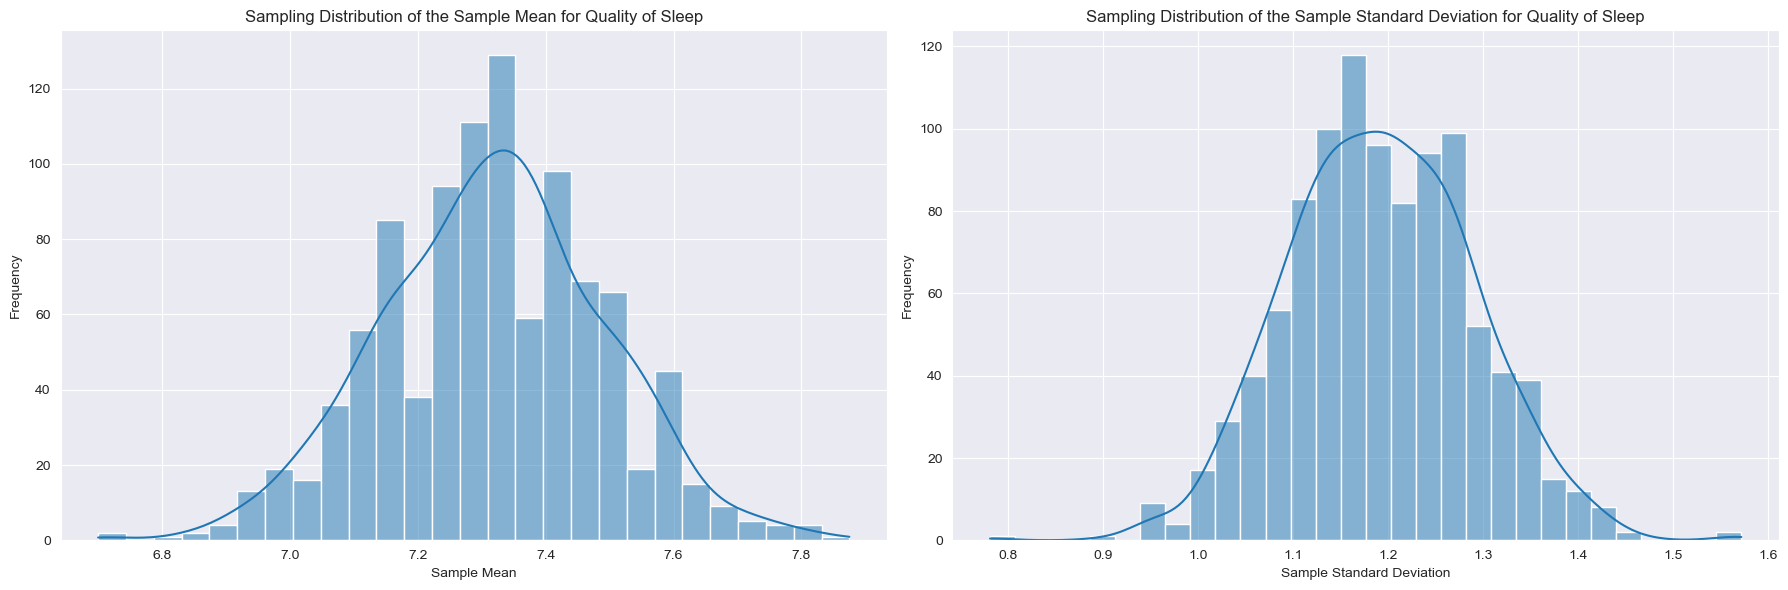

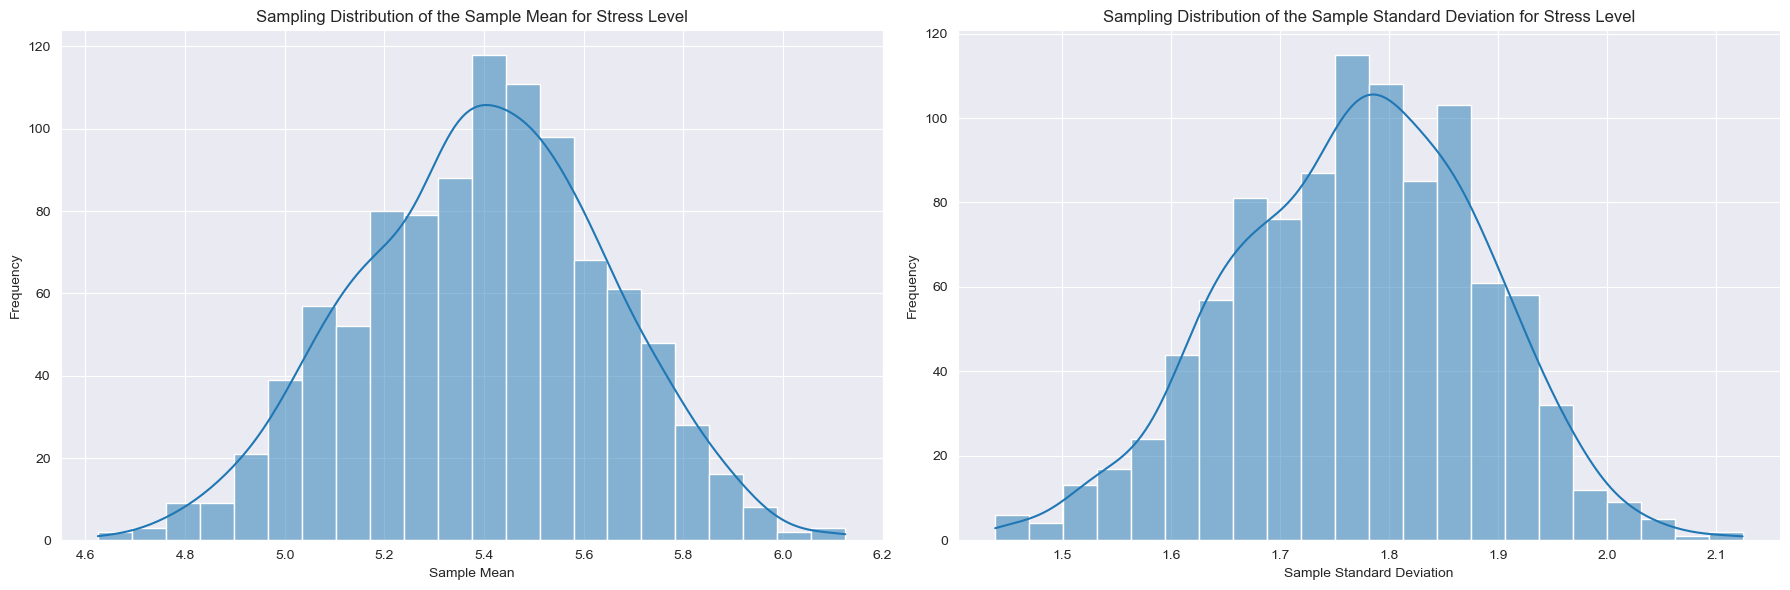

In [26]:
# Plot the sampling distributions for Quality of Sleep
fig, axs = plt.subplots(1, 2, figsize=(18, 6))

sns.histplot(sampling_dist_qos['Sample Mean'], kde=True, ax=axs[0])
axs[0].set_title(f'Sampling Distribution of the Sample Mean for Quality of Sleep')
axs[0].set_xlabel('Sample Mean')
axs[0].set_ylabel('Frequency')

sns.histplot(sampling_dist_qos['Sample Standard Deviation'], kde=True, ax=axs[1])
axs[1].set_title(f'Sampling Distribution of the Sample Standard Deviation for Quality of Sleep')
axs[1].set_xlabel('Sample Standard Deviation')
axs[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

# Plot the sampling distributions for Stress Level
fig, axs = plt.subplots(1, 2, figsize=(18, 6))

sns.histplot(sampling_dist_sl['Sample Mean'], kde=True, ax=axs[0])
axs[0].set_title(f'Sampling Distribution of the Sample Mean for Stress Level')
axs[0].set_xlabel('Sample Mean')
axs[0].set_ylabel('Frequency')

sns.histplot(sampling_dist_sl['Sample Standard Deviation'], kde=True, ax=axs[1])
axs[1].set_title(f'Sampling Distribution of the Sample Standard Deviation for Stress Level')
axs[1].set_xlabel('Sample Standard Deviation')
axs[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

This result shows that the sampling distribution of the sample mean and sample standard deviation for both 'Quality of Sleep' and 'Stress Level' are approximately normally distributed, which aligns with the Central Limit Theorem (CLT).

# 4. Statistical Intervals:
Sample data extraction based on user input

In [27]:
def extract_sample(data: pd.DataFrame, sample_size_n: int):
    if not (0 < sample_size_n <= len(data)):
        raise ValueError("Sample size must be greater than 0 and less than the size of the dataframe.")
    return data.sample(n=sample_size_n)

In [28]:
while True:
    try:
        sample_size = int(input(f"Enter the sample size (0 < sample size < {len(data_df)}): "))
        sample_data = extract_sample(data_df, sample_size)
        break
    except ValueError as e:
        print(e)

In [29]:
sample_data

,Quality of Sleep,Stress Level
205,8,5
298,9,3
242,6,7
309,7,7
106,6,6
...,...,...
237,7,4
293,6,8
158,8,5
9,7,6


## Calculate the CI for both columns at different confidence levels:

### z-distribution based CI calculation

In [30]:
def calculate_z_confidence_interval(input_sample_data: pd.Series, input_confidence_level: float):
    mean = input_sample_data.mean()
    std = input_sample_data.std()
    sample_size_n = len(input_sample_data)
    se = std / np.sqrt(sample_size_n)
    
    # Get the Z-score for the given confidence level
    z_score = norm.ppf(1 - (1 - input_confidence_level) / 2)
    
    # Calculate the margin of error
    moe = z_score * se
    
    # Calculate the two-sided confidence interval
    ci_lower = mean - moe
    ci_upper = mean + moe
    
    return ci_lower, ci_upper

def calculate_one_sided_z_confidence_interval(input_sample_data: pd.Series, input_confidence_level: float):
    mean = input_sample_data.mean()
    std = input_sample_data.std()
    sample_size_n = len(input_sample_data)
    se = std / np.sqrt(sample_size_n)
    
    # Get the Z-score for the given confidence level
    z_score = norm.ppf(input_confidence_level)
    
    # Calculate the margin of error
    moe = z_score * se
    
    # Calculate the one-sided confidence intervals
    ci_upper = mean + moe
    ci_lower = mean - moe
    
    return {"upper": (mean, ci_upper), "lower": (ci_lower, mean)}

### t-distribution based CI calculation

In [31]:
def calculate_t_confidence_interval(input_sample_data: pd.Series, input_confidence_level: float):
    mean = input_sample_data.mean()
    std = input_sample_data.std()
    sample_size_n = len(input_sample_data)
    se = std / np.sqrt(sample_size_n)
    
    # Get the T-score for the given confidence level and degrees of freedom
    t_score = t.ppf(1 - (1 - input_confidence_level) / 2, df=sample_size_n - 1)
    
    # Calculate the margin of error
    moe = t_score * se
    
    # Calculate the two-sided confidence interval
    ci_lower = mean - moe
    ci_upper = mean + moe
    
    return ci_lower, ci_upper

def calculate_one_sided_t_confidence_interval(input_sample_data: pd.Series, input_confidence_level: float):
    mean = input_sample_data.mean()
    std = input_sample_data.std()
    sample_size_n = len(input_sample_data)
    se = std / np.sqrt(sample_size_n)
    
    # Get the T-score for the given confidence level and degrees of freedom
    t_score = t.ppf(input_confidence_level, df=sample_size_n - 1)
    
    # Calculate the margin of error
    moe = t_score * se
    
    # Calculate the one-sided confidence intervals
    ci_upper = mean + moe
    ci_lower = mean - moe
    
    return {"upper": (mean, ci_upper), "lower": (ci_lower, mean)}

### Result

In [32]:
confidence_levels = [0.90, 0.95, 0.99]

# Calculate confidence intervals for both columns
ci_results = {col: {"z": {"two_sided": {}, "one_sided": {}}, "t": {"two_sided": {}, "one_sided": {}}} for col in ['Quality of Sleep', 'Stress Level']}
for col in ['Quality of Sleep', 'Stress Level']:
    for confidence_level in confidence_levels:
        if sample_size >= 30:
            ci_results[col]["z"]["two_sided"][confidence_level] = calculate_z_confidence_interval(sample_data[col], confidence_level)
            ci_results[col]["z"]["one_sided"][confidence_level] = calculate_one_sided_z_confidence_interval(sample_data[col], confidence_level)
        ci_results[col]["t"]["two_sided"][confidence_level] = calculate_t_confidence_interval(sample_data[col], confidence_level)
        ci_results[col]["t"]["one_sided"][confidence_level] = calculate_one_sided_t_confidence_interval(sample_data[col], confidence_level)

In [33]:
for col in ci_results:
    print(f"Confidence Intervals for {col}:")
    for method in ci_results[col]:
        for interval_type in ci_results[col][method]:
            for confidence_level, ci in ci_results[col][method][interval_type].items():
                print(
                    f"Method: {method}, Interval Type: {interval_type}, Confidence Level: {confidence_level}, CI: {ci}")
    print(f"Dataset's mean: {descriptive_data_df[col]['mean']}")
    print(f"")

Confidence Intervals for Quality of Sleep:
Method: z, Interval Type: two_sided, Confidence Level: 0.9, CI: (7.21681688264077, 7.42543663848599)
Method: z, Interval Type: two_sided, Confidence Level: 0.95, CI: (7.196833874795182, 7.445419646331578)
Method: z, Interval Type: two_sided, Confidence Level: 0.99, CI: (7.157778219513778, 7.4844753016129815)
Method: z, Interval Type: one_sided, Confidence Level: 0.9, CI: {'upper': (7.32112676056338, 7.402397510229563), 'lower': (7.2398560108971965, 7.32112676056338)}
Method: z, Interval Type: one_sided, Confidence Level: 0.95, CI: {'upper': (7.32112676056338, 7.42543663848599), 'lower': (7.21681688264077, 7.32112676056338)}
Method: z, Interval Type: one_sided, Confidence Level: 0.99, CI: {'upper': (7.32112676056338, 7.468654211499222), 'lower': (7.173599309627538, 7.32112676056338)}
Method: t, Interval Type: two_sided, Confidence Level: 0.9, CI: (7.21654319306185, 7.42571032806491)
Method: t, Interval Type: two_sided, Confidence Level: 0.95, C

# 5. Correlation

In [34]:
# Initialize the linear regression model
model = LinearRegression()

# Set "Stress Level" as the independent variable and "Quality of Sleep" as the dependent variable
stress_level = data['Stress Level'].values.reshape(-1, 1)  # Independent variable
quality_of_sleep = data['Quality of Sleep'].values  # Dependent variable

# Fit the linear regression model with the new setup
model.fit(stress_level, quality_of_sleep)

# Predict quality of sleep based on stress level
predicted_quality_of_sleep = model.predict(stress_level)

# Calculate the new R^2 coefficient
r_squared_revised = r2_score(quality_of_sleep, predicted_quality_of_sleep)
r_squared_revised

0.8077552132338894

The coefficient remains approximately 0.808 even when considering "Quality of Sleep" as the dependent variable explained by "Stress Level." This suggests that about 80.8% of the variance in "Quality of Sleep" can indeed be explained by "Stress Level" in this context.